### Import packages

In [1]:
from statistics import mean
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.mlab as mlb 
from vmdpy import VMD  
import pandas as pd
from vmd_post_func import *
import seaborn as sns
import pdb
from scipy.signal import find_peaks,peak_widths
from functools import reduce
import csv 
from vmd_optim import *

### Inputs

In [2]:
V = 10
num_passes = 10
freq_res = 0.1
bin_width = 0.5
fs = 1000
num_peaks = 30
sensors = ['front_axle','rear_axle']
num_sensors = 2
modes_included = 4

### File inputs:

In [3]:
file_path = '../../parametric_study_4_veh_2/case_studies/fatigue/'
L = [16,30,40,16,16,16,16,16,16,20,38,56,20,24,28]
case_studies = ['short_span','med_span','long_span','small_thick','med_thick','large_thick','low_num','med_num',
                'high_num','low_num_constant_flexure','med_num_constant_flexure',
                'high_num_constant_flexure','thin_constant_mass',
                'med_thick_constant_mass','large_thick_constant_mass']
veh_class = 'truck'

### Seaborn plotting style

In [4]:
# seaborn plot dictionary:
plot_style = {
    'font.size': 18.0,
    'font.family':'Times New Roman',
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'axes.linewidth': 1.5,
    'axes.grid':True,
    'grid.linewidth': 0.8,
    'grid.linestyle':'--',
    'grid.color':'k',
    'lines.linewidth': 2,
    'lines.markersize': 8.0,
    'patch.linewidth': 1.0,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.minor.width': 0.6,
    'ytick.minor.width': 0.6,
    'xtick.major.size': 5.5,
    'ytick.major.size': 5.5,
    'xtick.minor.size': 2.0,
    'ytick.minor.size': 2.0,
    'legend.title_fontsize': None
}

### Read VMD signals:

In [5]:
for pass_num in range(1,num_passes+1):  
    print(f'run number: {pass_num}')
    # (1) csv file name for decomposed signals of off and on bridge data:
    csv_file_off = file_path+veh_class+'/'+case_studies[3]+'/off_bridge/veh_pass_'+str(pass_num)+'.csv'
    csv_file_on = file_path+veh_class+'/'+case_studies[3]+'/on_bridge/veh_pass_'+str(pass_num)+'.csv'
    # (2) read csv:
    df_off = pd.read_csv(csv_file_off)
    df_on = pd.read_csv(csv_file_on)
    # (3) compute psd using welch's algorithm:
    f_on,psd_front_on = get_fft(df_on['front_axle'].to_numpy(),freq_res,fs)
    f_on_,psd_front_on_ = get_psd_welch_mlab(df_on['front_axle'].to_numpy(),freq_res,fs)
#     f_on,psd_rear_on = get_psd_welch(df_on['rear_axle'].to_numpy(),freq_res,fs) 
    # (4) plot time history:
#     fig,axs = plt.subplots(1)
#     sns.lineplot(x='time',y='front_axle',data=df_on,ax=axs)
    # (4) plot f vs psd:
#     fig,axs = plt.subplots(1,2,figsize=(26,6))
#     axs[0].plot(f_on_,psd_front_on_)
#     axs[1].plot(f_on,psd_front_on)
#     axs[0].set_xlim([0,100]);axs[1].set_xlim([0,100])
#     axs[0].vlines(7.1,0,psd_front_on_.max());axs[1].vlines(7.1,0,psd_front_on.max())
#     axs[0].set_title('signal.welch function'); axs[1].set_title('mlab.psd function')

run number: 1
run number: 2
run number: 3
run number: 4
run number: 5
run number: 6
run number: 7
run number: 8
run number: 9
run number: 10


run number: 1
> c:\users\oabuode\appdata\local\temp\ipykernel_6784\2649583946.py(62)<cell line: 4>()

ipdb> f_bounds
[[array([10.7, 10.7]), array([12.8, 12.8])], [array([13.4, 13.5]), array([16.3, 16.4])], [array([21.2, 20.1]), array([28.9, 25.4])], [array([35.6, 31. ]), array([43.9, 39. ])]]
ipdb> psd_final_on_.shape
(5000, 2, 4)
ipdb> plt.plot(f_on_,psd_final_on_[:,0,0]
*** SyntaxError: '(' was never closed
ipdb> plt.plot(f_on_,psd_final_on_[:,0,0])
ipdb> plt.plot(f,sel_psd_off[:,0,0])
ipdb> plt.vlines(10.7,1)
*** TypeError: vlines() missing 1 required positional argument: 'ymax'
ipdb> plt.vlines(10.7,0,1)
ipdb> max([np.max(psd_final_on_[:,0,0]),np.max(sel_psd_off[:,0,0])])
0.00040702918890319083
ipdb> plt.ylim([0,0.0005])
(0.0, 0.0005)
ipdb> plt.xlim([0,20])
(0.0, 20.0)
ipdb> plt.show()


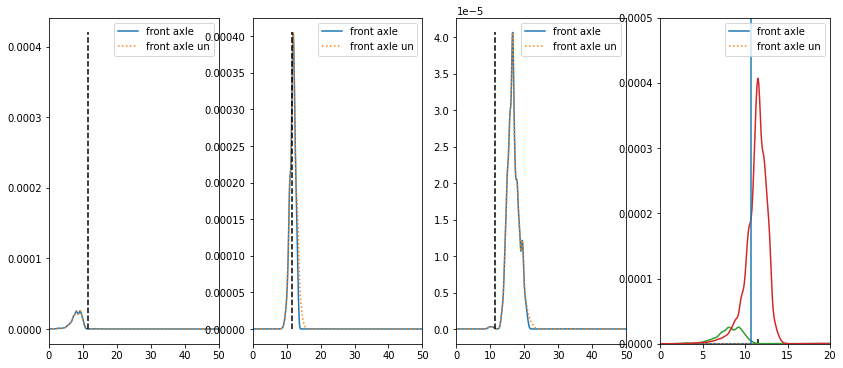

ipdb> plt.plot(f_on_,psd_final_on_[:,0,0])
ipdb> plt.show()


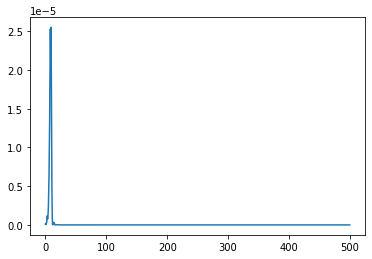

ipdb> plt.plot(f_on_,psd_final_on_[:,0,0])
ipdb> plt.plot(f,sel_psd_off[:,0,0])
ipdb> plt.vlines(10.7,0,1)
ipdb> plt.ylim([0,0.0005])
(0.0, 0.0005)
ipdb> plt.xlim([0,20])
(0.0, 20.0)
ipdb> plt.show()


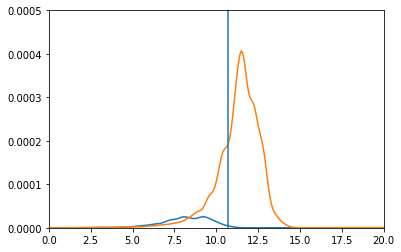

In [ ]:
df_on_concat = pd.DataFrame()
df_off_concat = pd.DataFrame()
mode_names = gen_mode_num(modes_included)
for pass_num in range(1,num_passes+1):  
    print(f'run number: {pass_num}')
    # (1) csv file name for decomposed signals of off and on bridge data:
    csv_file_off = file_path+veh_class+'/'+case_studies[2]+'/vmd_sigs/dec_sigs_off_'+str(pass_num)+'.csv'
    csv_file_on = file_path+veh_class+'/'+case_studies[2]+'/vmd_sigs/dec_sigs_on_'+str(pass_num)+'.csv'
    
    # (2) read csv file into dataframe:
    df_vmd_sigs_off = pd.read_csv(csv_file_off)
    len_sig_off = len(df_vmd_sigs_off[(df_vmd_sigs_off['mode_num'] == 'mode_1') & (df_vmd_sigs_off['sensor'] == 'body')]['acc'].values)
    df_vmd_sigs_on = pd.read_csv(csv_file_on)
    len_sig_on = len(df_vmd_sigs_on[(df_vmd_sigs_on['mode_num'] == 'mode_1') & (df_vmd_sigs_on['sensor'] == 'body')]['acc'].values)
    
    # (3) Select two modes:
    sel_dec_off = np.zeros((len_sig_off,num_sensors,modes_included))
    sel_dec_on= np.zeros((len_sig_on,num_sensors,modes_included))
    for idx_mode,mode_num in enumerate(mode_names):
        for count,sens in enumerate(sensors):
            sel_dec_off[:,count,idx_mode] = df_vmd_sigs_off[(df_vmd_sigs_off['sensor']==sens) & (df_vmd_sigs_off['mode_num'] == mode_num)]['acc'].values
            sel_dec_on[:,count,idx_mode] = df_vmd_sigs_on[(df_vmd_sigs_on['sensor']==sens) & (df_vmd_sigs_on['mode_num'] == mode_num)]['acc'].values
            
    # (4) Compute psd:
    # preallocate lists to store psd matrices of decomposed signals:
    f,sel_psd_off = get_psd_welch(sel_dec_off,freq_res,fs)
    max_psd_off = np.max(sel_psd_off,axis=0)
    idx_max_psd_off = np.argmax(sel_psd_off,axis=0)
    # (5) Compute peak widths:
    f_bounds = []
    for mode_num in range(modes_included):
        f_bounds.append(get_freq_bounds(f,sel_psd_off[:,:,mode_num],idx_max_psd_off[:,mode_num]))
    # (6) Execute bandstop filter:
    # off-bridge:
    sig_final_off = np.zeros(sel_dec_off.shape)
    # on-bridge:
    sig_final_on = np.zeros(sel_dec_on.shape)
    for mode_num in range(modes_included):
        for i in range(num_sensors):
            sig_final_off[:,i,mode_num] = butter_filter(sel_dec_off[:,i,mode_num], [f_bounds[mode_num][0][i],f_bounds[mode_num][1][i]], 'bandstop', fs, 8)
        for i in range(num_sensors):
            sig_final_on[:,i,mode_num] = butter_filter(sel_dec_on[:,i,mode_num], [f_bounds[mode_num][0][i],f_bounds[mode_num][1][i]], 'bandstop', fs, 8)      
    
    # (7) Compute psd:
    # Off-bridge:
    f_off,psd_final_off = get_psd_welch(sig_final_off,freq_res,fs)
    # On-bridge:
    f_on,psd_final_on = get_psd_welch(sig_final_on,freq_res,fs)
#     print(f'maximum psd is {np.max(psd_final_on[:,:,0],axis=0)}')
#     print(f'psd of bridge frequency is {psd_final_on[f_on==1.1,:,0]}')
    f_on_,psd_final_on_ = get_psd_welch(sel_dec_on,freq_res,fs)
    fig,axs = plt.subplots(1,modes_included,figsize=(14,6))
    for idx_mode,mode_num in enumerate(mode_names):
        axs[idx_mode].plot(f_on,psd_final_on[:,0,idx_mode])# ;axs[idx_mode].plot(f_on,psd_final_on[:,1,idx_mode])
        axs[idx_mode].plot(f_on_,psd_final_on_[:,0,idx_mode],ls=':')#;axs[idx_mode].plot(f_on_,psd_final_on_[:,1,idx_mode],ls=':')
        axs[idx_mode].vlines(11.5,0,np.max(psd_final_on_[:,:,idx_mode]),ls='--',color='k')
        axs[idx_mode].legend(['front axle','front axle un'])
#         axs[idx_mode].legend(['front axle','rear axle','front axle un','rear axle un','bridge freq']);axs[idx_mode].set_title(mode_num)
        axs[idx_mode].set_xlim([0,50])
    pdb.set_trace()
    # (12) Peak picking:
    peak_psd_off,peak_f_off = [],[]
    peak_psd_on,peak_f_on = [],[]
    for mode_num in range(modes_included):
        # off-bridge:
        peak_psd_temp,peak_f_temp = get_peaks(f_off,freq_res*2,psd_final_off[:,:,mode_num],num_peaks)
        peak_psd_off.append(peak_psd_temp)
        peak_f_off.append(peak_f_temp)
        # on-bridge:
        peak_psd_temp,peak_f_temp = get_peaks(f_on,freq_res*2,psd_final_on[:,:,mode_num],num_peaks)
        peak_psd_on.append(peak_psd_temp)
        peak_f_on.append(peak_f_temp)
       
    # (13) Store final results into dataframes:
    res_dict = {'peak_f':[],'peak_psd':[],'sensor':[],'mode_num':[],'pass_num':[]}
    for idx_mode,mode_num in enumerate(mode_names):
        for idx_out,p_psd in enumerate(peak_psd_off[idx_mode]):
            for idx_in,elem in enumerate(p_psd):
                res_dict['peak_f'].append(peak_f_off[idx_mode][idx_out][idx_in])
                res_dict['peak_psd'].append(elem)
                res_dict['sensor'].append(sensors[idx_out])
                res_dict['mode_num'].append(mode_num)
                res_dict['pass_num'].append(pass_num)
    df_off = pd.DataFrame(res_dict)
    # on-bridge:
    res_dict = {'peak_f':[],'peak_psd':[],'sensor':[],'mode_num':[],'pass_num':[]}
    for idx_mode,mode_num in enumerate(mode_names):
        for idx_out,p_psd in enumerate(peak_psd_on[idx_mode]):
            for idx_in,elem in enumerate(p_psd):
                res_dict['peak_f'].append(peak_f_on[idx_mode][idx_out][idx_in])
                res_dict['peak_psd'].append(elem)
                res_dict['sensor'].append(sensors[idx_out])
                res_dict['mode_num'].append(mode_num)
                res_dict['pass_num'].append(pass_num)
    df_on = pd.DataFrame(res_dict)
    # (14) Concatenate dfs into one final df:
    # off-bridge:
    df_off_concat = pd.concat((df_off_concat,df_off))
    # on-bridge:
    df_on_concat = pd.concat((df_on_concat,df_on))
    
# reset indices:
df_off_concat.reset_index(inplace=True,drop=True)
df_on_concat.reset_index(inplace=True,drop=True)


### First 5 elements of grouped off-bridge signals:

In [7]:
df_off_concat.head()

,peak_f,peak_psd,sensor,mode_num,pass_num
0,10.4,0.000151,front_axle,mode_1,1
1,10.6,0.000137,front_axle,mode_1,1
2,10.2,0.000129,front_axle,mode_1,1
3,13.3,0.000035,front_axle,mode_1,1
4,12.9,0.000035,front_axle,mode_1,1


In [8]:
df_on_concat.head()

,peak_f,peak_psd,sensor,mode_num,pass_num
0,9.2,0.000026,front_axle,mode_1,1
1,8.1,0.000025,front_axle,mode_1,1
2,9.4,0.000024,front_axle,mode_1,1
3,7.9,0.000024,front_axle,mode_1,1
4,8.3,0.000024,front_axle,mode_1,1


### Drop frequencies that are repeated less than 20% of the time:

In [9]:
df_on_concat = drop_rep_freq(df_on_concat,2).reset_index(drop=True)
df_off_concat = drop_rep_freq(df_off_concat,2).reset_index(drop=True)

In [10]:
df_on_concat

,peak_f,peak_psd,sensor,mode_num,pass_num
0,9.2,0.000026,front_axle,mode_1,1
1,9.4,0.000024,front_axle,mode_1,1
2,9.0,0.000024,front_axle,mode_1,1
3,13.3,0.000119,rear_axle,mode_1,1
4,10.1,0.000117,rear_axle,mode_1,1
...,...,...,...,...,...
589,23.4,0.000005,rear_axle,mode_4,10
590,23.6,0.000005,rear_axle,mode_4,10
591,22.1,0.000004,rear_axle,mode_4,10
592,22.3,0.000004,rear_axle,mode_4,10


### Separate dfs into respective sensors on-bridge:

In [11]:
df_body_on = df_on_concat[df_on_concat['sensor'] == 'body'].copy().reset_index(drop=True).drop('sensor',axis=1)
df_front_on = df_on_concat[df_on_concat['sensor'] == 'front_axle'].copy().reset_index(drop=True).drop('sensor',axis=1)
df_rear_on = df_on_concat[df_on_concat['sensor'] == 'rear_axle'].copy().reset_index(drop=True).drop('sensor',axis=1)

In [12]:
df_front_on.loc[(df_front_on['pass_num']==1) & (df_front_on['mode_num']=='mode_1')]

,peak_f,peak_psd,mode_num,pass_num
0,9.2,0.000026,mode_1,1
1,9.4,0.000024,mode_1,1
2,9.0,0.000024,mode_1,1


In [13]:
df_rear_on.loc[(df_rear_on['pass_num']==1) & (df_rear_on['mode_num']=='mode_1')]

,peak_f,peak_psd,mode_num,pass_num
0,13.3,0.000119,mode_1,1
1,10.1,0.000117,mode_1,1
2,10.3,0.000112,mode_1,1
3,13.5,0.000111,mode_1,1
4,9.9,0.000110,mode_1,1
5,13.1,0.000109,mode_1,1


In [14]:
df_rear_on

,peak_f,peak_psd,mode_num,pass_num
0,13.3,0.000119,mode_1,1
1,10.1,0.000117,mode_1,1
2,10.3,0.000112,mode_1,1
3,13.5,0.000111,mode_1,1
4,9.9,0.000110,mode_1,1
...,...,...,...,...
299,23.4,0.000005,mode_4,10
300,23.6,0.000005,mode_4,10
301,22.1,0.000004,mode_4,10
302,22.3,0.000004,mode_4,10


### Separate dfs into respective sensors off-bridge:

In [15]:
# df_body_off = df_off_concat[df_off_concat['sensor'] == 'body'].copy().reset_index(drop=True).drop('sensor',axis=1)
df_front_off = df_off_concat[df_off_concat['sensor'] == 'front_axle'].copy().reset_index(drop=True).drop('sensor',axis=1)
df_rear_off = df_off_concat[df_off_concat['sensor'] == 'rear_axle'].copy().reset_index(drop=True).drop('sensor',axis=1)

In [16]:
df_front_off

,peak_f,peak_psd,mode_num,pass_num
0,10.4,1.505521e-04,mode_1,1
1,10.6,1.366238e-04,mode_1,1
2,10.2,1.288719e-04,mode_1,1
3,13.3,3.503194e-05,mode_1,1
4,12.9,3.485368e-05,mode_1,1
...,...,...,...,...
227,39.8,9.580533e-07,mode_4,10
228,39.6,8.991299e-07,mode_4,10
229,30.2,7.251229e-07,mode_4,10
230,30.4,6.646206e-07,mode_4,10


In [17]:
df_rear_off

,peak_f,peak_psd,mode_num,pass_num
0,10.5,0.000124,mode_1,1
1,10.3,0.000115,mode_1,1
2,13.1,0.000067,mode_1,1
3,12.9,0.000061,mode_1,1
4,13.3,0.000061,mode_1,1
...,...,...,...,...
234,19.5,0.000003,mode_3,10
235,19.3,0.000003,mode_3,10
236,19.7,0.000002,mode_3,10
237,27.4,0.000002,mode_3,10


### Bin data for on-birdge:

In [18]:
# Body:
# df_body_on_bin = bin_df(df_body_on,bin_width)
# Front:
df_front_on_bin = bin_df(df_front_on,bin_width)
# Rear: 
df_rear_on_bin = bin_df(df_rear_on,bin_width)

In [19]:
df_front_on_bin

,peak_f,peak_psd,mode_num,pass_num,bins
0,9.2,0.000026,mode_1,1,"[9.0, 9.5)"
1,9.4,0.000024,mode_1,1,"[9.0, 9.5)"
2,9.0,0.000024,mode_1,1,"[9.0, 9.5)"
3,11.9,0.000405,mode_2,1,"[11.5, 12.0)"
4,12.1,0.000388,mode_2,1,"[12.0, 12.5)"
...,...,...,...,...,...
285,26.6,0.000005,mode_4,10,"[26.5, 27.0)"
286,27.9,0.000003,mode_4,10,"[27.5, 28.0)"
287,28.1,0.000003,mode_4,10,"[28.0, 28.5)"
288,28.9,0.000002,mode_4,10,"[28.5, 29.0)"


In [20]:
df_rear_on_bin

,peak_f,peak_psd,mode_num,pass_num,bins
0,13.3,0.000119,mode_1,1,"[13.0, 13.5)"
1,10.1,0.000117,mode_1,1,"[10.0, 10.5)"
2,10.3,0.000112,mode_1,1,"[10.0, 10.5)"
3,13.5,0.000111,mode_1,1,"[13.5, 14.0)"
4,9.9,0.000110,mode_1,1,"[9.5, 10.0)"
...,...,...,...,...,...
299,23.4,0.000005,mode_4,10,"[23.0, 23.5)"
300,23.6,0.000005,mode_4,10,"[23.5, 24.0)"
301,22.1,0.000004,mode_4,10,"[22.0, 22.5)"
302,22.3,0.000004,mode_4,10,"[22.0, 22.5)"


### Finding common frequencies between front and rear axles:

#### Test part of the find_common function

In [21]:
elem_intersect = np.unique(df_front_on_bin[df_front_on_bin['bins'].isin(df_rear_on_bin['bins'])]['bins'].to_numpy())
elem_intersect

array([Interval(6.5, 7.0, closed='left'),
       Interval(7.0, 7.5, closed='left'),
       Interval(7.5, 8.0, closed='left'),
       Interval(8.0, 8.5, closed='left'),
       Interval(8.5, 9.0, closed='left'),
       Interval(9.0, 9.5, closed='left'),
       Interval(9.5, 10.0, closed='left'),
       Interval(10.0, 10.5, closed='left'),
       Interval(10.5, 11.0, closed='left'),
       Interval(11.5, 12.0, closed='left'),
       Interval(12.0, 12.5, closed='left'),
       Interval(13.0, 13.5, closed='left'),
       Interval(13.5, 14.0, closed='left'),
       Interval(14.5, 15.0, closed='left'),
       Interval(15.0, 15.5, closed='left'),
       Interval(15.5, 16.0, closed='left'),
       Interval(16.0, 16.5, closed='left'),
       Interval(16.5, 17.0, closed='left'),
       Interval(17.0, 17.5, closed='left'),
       Interval(18.5, 19.0, closed='left'),
       Interval(19.0, 19.5, closed='left'),
       Interval(19.5, 20.0, closed='left'),
       Interval(20.0, 20.5, closed='left'),
 

In [22]:
# concatenate and extract the elements that are within the intersection:
df_concat = pd.concat((df_front_on_bin,df_rear_on_bin))
df_concat = df_concat.loc[df_concat['bins'].isin(elem_intersect)].reset_index(drop=True)
df_concat[df_concat['bins']==pd.Interval(6.0,6.5,closed='left')]

,peak_f,peak_psd,mode_num,pass_num,bins


In [23]:
# group by bins and vehicle pass to distinguish between them:
df_group = df_concat.groupby(['bins','pass_num']).agg(peak_f=('peak_f',lambda x: x.iloc[0]),count=('bins','count'),
                                                    mean_peak_psd=('peak_psd','mean')).dropna().reset_index()
df_group

,bins,pass_num,peak_f,count,mean_peak_psd
0,"[6.5, 7.0)",2,6.8,1,1.227229e-06
1,"[6.5, 7.0)",3,6.8,1,5.337703e-06
2,"[6.5, 7.0)",6,6.8,1,1.271252e-05
3,"[6.5, 7.0)",8,6.8,1,1.034214e-05
4,"[6.5, 7.0)",9,6.8,1,1.076563e-05
...,...,...,...,...,...
264,"[30.0, 30.5)",8,30.0,1,1.409794e-06
265,"[30.0, 30.5)",9,30.1,2,2.223808e-06
266,"[30.5, 31.0)",3,30.5,1,2.385754e-06
267,"[30.5, 31.0)",4,30.5,1,5.116782e-07


In [24]:
# group by bins and vehicle pass to distinguish between them:
df_group = df_concat.groupby(['pass_num','peak_f']).agg(bins=('bins',lambda x: x.iloc[0]),count=('bins','count'),
                                                    mean_peak_psd=('peak_psd','mean')).dropna().reset_index()
df_group[df_group['peak_f'] == 6.9]

,pass_num,peak_f,bins,count,mean_peak_psd


In [25]:
df_group.groupby('peak_f').agg(peak_f_count=('peak_f','count'),bins=('bins',lambda x: x.iloc[0]),mean_peak_psd=('mean_peak_psd','mean')).dropna().reset_index()

,peak_f,peak_f_count,bins,mean_peak_psd
0,6.8,5,"[6.5, 7.0)",0.000008
1,7.0,5,"[7.0, 7.5)",0.000008
2,7.2,4,"[7.0, 7.5)",0.000008
3,7.8,3,"[7.5, 8.0)",0.000018
4,8.0,6,"[8.0, 8.5)",0.000019
...,...,...,...,...
125,29.9,6,"[29.5, 30.0)",0.000002
126,30.0,3,"[30.0, 30.5)",0.000002
127,30.1,6,"[30.0, 30.5)",0.000002
128,30.3,5,"[30.0, 30.5)",0.000002


#### beginning of find_common function:

In [26]:
df_on_common = find_common(df_front_on_bin,df_rear_on_bin)
df_on_common

,peak_f,peak_f_count,bins,mean_peak_psd
0,6.8,5,"[6.5, 7.0)",0.000008
1,7.0,5,"[7.0, 7.5)",0.000008
2,7.2,4,"[7.0, 7.5)",0.000008
3,7.8,3,"[7.5, 8.0)",0.000018
4,8.0,6,"[8.0, 8.5)",0.000019
...,...,...,...,...
125,29.9,6,"[29.5, 30.0)",0.000002
126,30.0,3,"[30.0, 30.5)",0.000002
127,30.1,6,"[30.0, 30.5)",0.000002
128,30.3,5,"[30.0, 30.5)",0.000002


In [27]:
df_bins_on = df_on_common.groupby('bins').agg(bins_count=('peak_f_count','sum'),mean_peak_psd=('mean_peak_psd','mean')).dropna().reset_index()
df_bins_on

,bins,bins_count,mean_peak_psd
0,"[6.5, 7.0)",5,0.000008
1,"[7.0, 7.5)",9,0.000008
2,"[7.5, 8.0)",3,0.000018
3,"[8.0, 8.5)",16,0.000016
4,"[8.5, 9.0)",10,0.000027
5,"[9.0, 9.5)",24,0.000030
6,"[9.5, 10.0)",3,0.000086
7,"[10.0, 10.5)",13,0.000063
8,"[10.5, 11.0)",3,0.000060
9,"[11.5, 12.0)",22,0.000370


In [28]:
df_freq_on = df_on_common.drop('bins',axis=1)
df_freq_on

,peak_f,peak_f_count,mean_peak_psd
0,6.8,5,0.000008
1,7.0,5,0.000008
2,7.2,4,0.000008
3,7.8,3,0.000018
4,8.0,6,0.000019
...,...,...,...
125,29.9,6,0.000002
126,30.0,3,0.000002
127,30.1,6,0.000002
128,30.3,5,0.000002


### Bin data for off-birdge:

In [29]:
# Body:
# df_body_off_bin = bin_df(df_body_off,bin_width)
# Front:
df_front_off_bin = bin_df(df_front_off,bin_width)
# Rear: 
df_rear_off_bin = bin_df(df_rear_off,bin_width)


In [30]:
df_front_off_bin

,peak_f,peak_psd,mode_num,pass_num,bins
0,10.4,1.505521e-04,mode_1,1,"[10.0, 10.5)"
1,10.6,1.366238e-04,mode_1,1,"[10.5, 11.0)"
2,10.2,1.288719e-04,mode_1,1,"[10.0, 10.5)"
3,13.3,3.503194e-05,mode_1,1,"[13.0, 13.5)"
4,12.9,3.485368e-05,mode_1,1,"[12.5, 13.0)"
...,...,...,...,...,...
227,39.8,9.580533e-07,mode_4,10,"[39.5, 40.0)"
228,39.6,8.991299e-07,mode_4,10,"[39.5, 40.0)"
229,30.2,7.251229e-07,mode_4,10,"[30.0, 30.5)"
230,30.4,6.646206e-07,mode_4,10,"[30.0, 30.5)"


In [31]:
df_rear_off_bin

,peak_f,peak_psd,mode_num,pass_num,bins
0,10.5,0.000124,mode_1,1,"[10.5, 11.0)"
1,10.3,0.000115,mode_1,1,"[10.0, 10.5)"
2,13.1,0.000067,mode_1,1,"[13.0, 13.5)"
3,12.9,0.000061,mode_1,1,"[12.5, 13.0)"
4,13.3,0.000061,mode_1,1,"[13.0, 13.5)"
...,...,...,...,...,...
234,19.5,0.000003,mode_3,10,"[19.5, 20.0)"
235,19.3,0.000003,mode_3,10,"[19.0, 19.5)"
236,19.7,0.000002,mode_3,10,"[19.5, 20.0)"
237,27.4,0.000002,mode_3,10,"[27.0, 27.5)"


### Finding common frequencies between front and rear axles:

In [32]:
df_off_common = find_common(df_front_off_bin,df_rear_off_bin)
df_off_common

,peak_f,peak_f_count,bins,mean_peak_psd
0,9.9,5,"[9.5, 10.0)",8.707264e-05
1,10.0,5,"[10.0, 10.5)",7.716757e-05
2,10.1,5,"[10.0, 10.5)",9.804421e-05
3,10.2,6,"[10.0, 10.5)",9.163918e-05
4,10.3,6,"[10.0, 10.5)",1.105019e-04
...,...,...,...,...
95,39.9,3,"[39.5, 40.0)",9.337490e-07
96,46.0,3,"[46.0, 46.5)",5.562636e-07
97,46.2,3,"[46.0, 46.5)",5.997031e-07
98,46.4,3,"[46.0, 46.5)",6.057636e-07


In [33]:
df_freq_off = df_off_common.drop('bins',axis=1)
df_freq_off

,peak_f,peak_f_count,mean_peak_psd
0,9.9,5,8.707264e-05
1,10.0,5,7.716757e-05
2,10.1,5,9.804421e-05
3,10.2,6,9.163918e-05
4,10.3,6,1.105019e-04
...,...,...,...
95,39.9,3,9.337490e-07
96,46.0,3,5.562636e-07
97,46.2,3,5.997031e-07
98,46.4,3,6.057636e-07


In [34]:
df_bins_off = df_off_common.groupby('bins').agg(bins_count=('peak_f_count','sum'),mean_peak_psd=('mean_peak_psd','mean')).dropna().reset_index()
df_bins_off

,bins,bins_count,mean_peak_psd
0,"[9.5, 10.0)",5,8.707264e-05
1,"[10.0, 10.5)",29,9.504317e-05
2,"[10.5, 11.0)",8,1.161063e-04
3,"[12.5, 13.0)",7,7.227792e-05
4,"[13.0, 13.5)",35,6.761182e-05
5,"[13.5, 14.0)",26,3.004126e-05
6,"[16.5, 17.0)",2,1.943845e-05
7,"[18.0, 18.5)",11,1.342439e-05
8,"[18.5, 19.0)",15,9.449529e-06
9,"[19.0, 19.5)",13,8.125617e-06


In [35]:
df_bins_on

,bins,bins_count,mean_peak_psd
0,"[6.5, 7.0)",5,0.000008
1,"[7.0, 7.5)",9,0.000008
2,"[7.5, 8.0)",3,0.000018
3,"[8.0, 8.5)",16,0.000016
4,"[8.5, 9.0)",10,0.000027
5,"[9.0, 9.5)",24,0.000030
6,"[9.5, 10.0)",3,0.000086
7,"[10.0, 10.5)",13,0.000063
8,"[10.5, 11.0)",3,0.000060
9,"[11.5, 12.0)",22,0.000370


### get set difference between on and off bridge data

In [36]:
diff_df = df_bins_on.merge(df_bins_off, how = 'outer' ,on = 'bins',indicator=True).loc[lambda x : x['_merge']=='left_only'].drop(['bins_count_y','mean_peak_psd_y','_merge'],axis=1).rename(columns={'bins_count_x':'bins_count','mean_peak_psd_x':'mean_peak_psd'})
diff_df.reset_index(drop=True)

,bins,bins_count,mean_peak_psd
0,"[6.5, 7.0)",5.0,0.000008
1,"[7.0, 7.5)",9.0,0.000008
2,"[7.5, 8.0)",3.0,0.000018
3,"[8.0, 8.5)",16.0,0.000016
4,"[8.5, 9.0)",10.0,0.000027
5,"[9.0, 9.5)",24.0,0.000030
6,"[11.5, 12.0)",22.0,0.000370
7,"[12.0, 12.5)",13.0,0.000364
8,"[14.5, 15.0)",4.0,0.000016
9,"[15.0, 15.5)",15.0,0.000027


In [37]:
df_diff = get_diff_col(df_bins_on,df_bins_off,'bins')

In [38]:
df_diff

,bins,bins_count,mean_peak_psd
0,"[6.5, 7.0)",5,0.000008
1,"[7.0, 7.5)",9,0.000008
2,"[7.5, 8.0)",3,0.000018
3,"[8.0, 8.5)",16,0.000016
4,"[8.5, 9.0)",10,0.000027
5,"[9.0, 9.5)",24,0.00003
6,"[11.5, 12.0)",22,0.00037
7,"[12.0, 12.5)",13,0.000364
8,"[14.5, 15.0)",4,0.000016
9,"[15.0, 15.5)",15,0.000027


### Extract exact frequencies from the binned data

In [39]:
if df_diff['mean_peak_psd'].loc[0] == 0:
    df_freq_final = pd.DataFrame(columns=df_on_common.columns)
    df_freq_final['peak_f'] = [0]
    df_freq_final['peak_f_count'] = [1]
    df_freq_final['bins'] = df_diff['bins']
    df_freq_final['mean_peak_psd'] = [0]
else:
    df_freq_final = df_on_common[df_on_common['bins'].isin(df_diff['bins'])].reset_index(drop=True)
df_freq_final

,peak_f,peak_f_count,bins,mean_peak_psd
0,6.8,5,"[6.5, 7.0)",0.000008
1,7.0,5,"[7.0, 7.5)",0.000008
2,7.2,4,"[7.0, 7.5)",0.000008
3,7.8,3,"[7.5, 8.0)",0.000018
4,8.0,6,"[8.0, 8.5)",0.000019
...,...,...,...,...
94,29.6,3,"[29.5, 30.0)",0.000002
95,29.7,4,"[29.5, 30.0)",0.000002
96,29.8,3,"[29.5, 30.0)",0.000002
97,29.9,6,"[29.5, 30.0)",0.000002


### Compute statistics

In [40]:
# probability of detecting bridge freq
df_stat = df_freq_final.copy()
df_stat['prob'] = df_freq_final['peak_f_count']/10
# compute bridge to vehicle mean psd ratio:
df_stat['mean_ratio'] = df_freq_final['mean_peak_psd']/df_bins_off['mean_peak_psd'].max()
# add column to distinguish between analyses:
df_stat['veh_class'] = df_stat.shape[0]*[veh_class]
df_stat['case'] = df_stat.shape[0]*[case_studies[9]]
df_stat

,peak_f,peak_f_count,bins,mean_peak_psd,prob,mean_ratio,veh_class,case
0,6.8,5,"[6.5, 7.0)",0.000008,0.5,0.069566,truck,low_num_constant_flexure
1,7.0,5,"[7.0, 7.5)",0.000008,0.5,0.072326,truck,low_num_constant_flexure
2,7.2,4,"[7.0, 7.5)",0.000008,0.4,0.066810,truck,low_num_constant_flexure
3,7.8,3,"[7.5, 8.0)",0.000018,0.3,0.157940,truck,low_num_constant_flexure
4,8.0,6,"[8.0, 8.5)",0.000019,0.6,0.159820,truck,low_num_constant_flexure
...,...,...,...,...,...,...,...,...
94,29.6,3,"[29.5, 30.0)",0.000002,0.3,0.014649,truck,low_num_constant_flexure
95,29.7,4,"[29.5, 30.0)",0.000002,0.4,0.018914,truck,low_num_constant_flexure
96,29.8,3,"[29.5, 30.0)",0.000002,0.3,0.015566,truck,low_num_constant_flexure
97,29.9,6,"[29.5, 30.0)",0.000002,0.6,0.016347,truck,low_num_constant_flexure


### Plot histograms

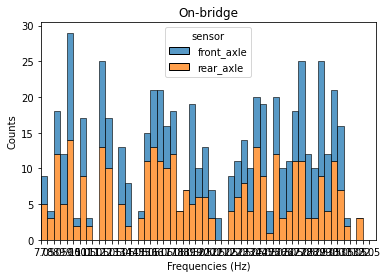

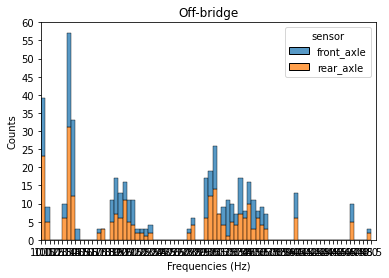

In [41]:
fig_on,hist_on = get_hist_freq(df_on_concat,['front_axle','rear_axle'],bin_width,'On-bridge')
fig_off,hist_off = get_hist_freq(df_off_concat,['front_axle','rear_axle'],bin_width,'Off-bridge')